# <font color='darkgreen'>Applied data science capstone- final assignment project</font>

---

## <font color='green'>Introduction</font>

Traffic accidents have an adverse effect both on an individual and societal level resulting in costs due to person injuries and property damage, increased travel times and emissions due to congestion.

Although the outcome of one accident can be very different to another, the underlying cause can be very similar. Roads shrouded in dense fog can make driving incredibly dangerous, limiting visibility of the looming road ahead. Large amounts of rain or snowfall can also provide treacherous driving conditions which will affect a great number of road users.

The question is:

### <i>Given the weather and the road conditions- what is the possibility of a person getting into a car accident and how severe it would be, so that he/she would drive more carefully or even change his/her travel if he/she is able to.</i>

#### Presented research can be useful for all of the people with driving license.

---

## <font color='green'>Data description</font>

#### High level description

The dataset covers all types collisions (2004 till now) marked with appropriate codes and enriched with such information as severity of the accident, weather or an indication, that the accident involved hitting the parked car or how many people were involved.

#### Features details:

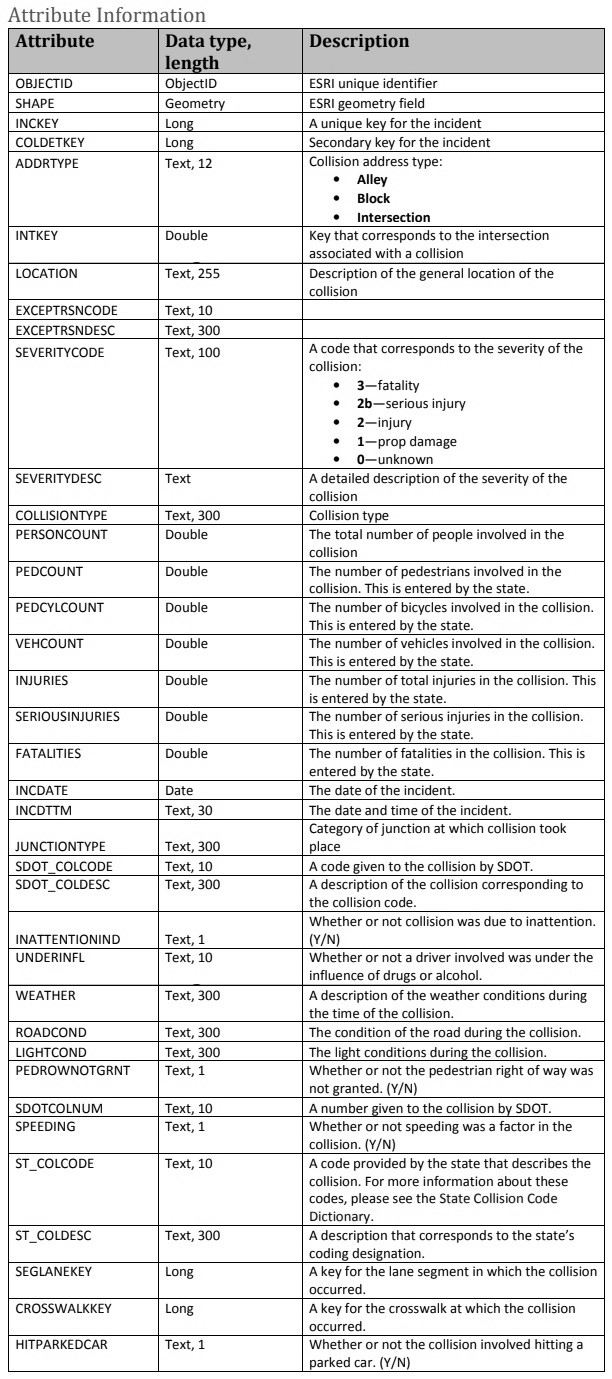

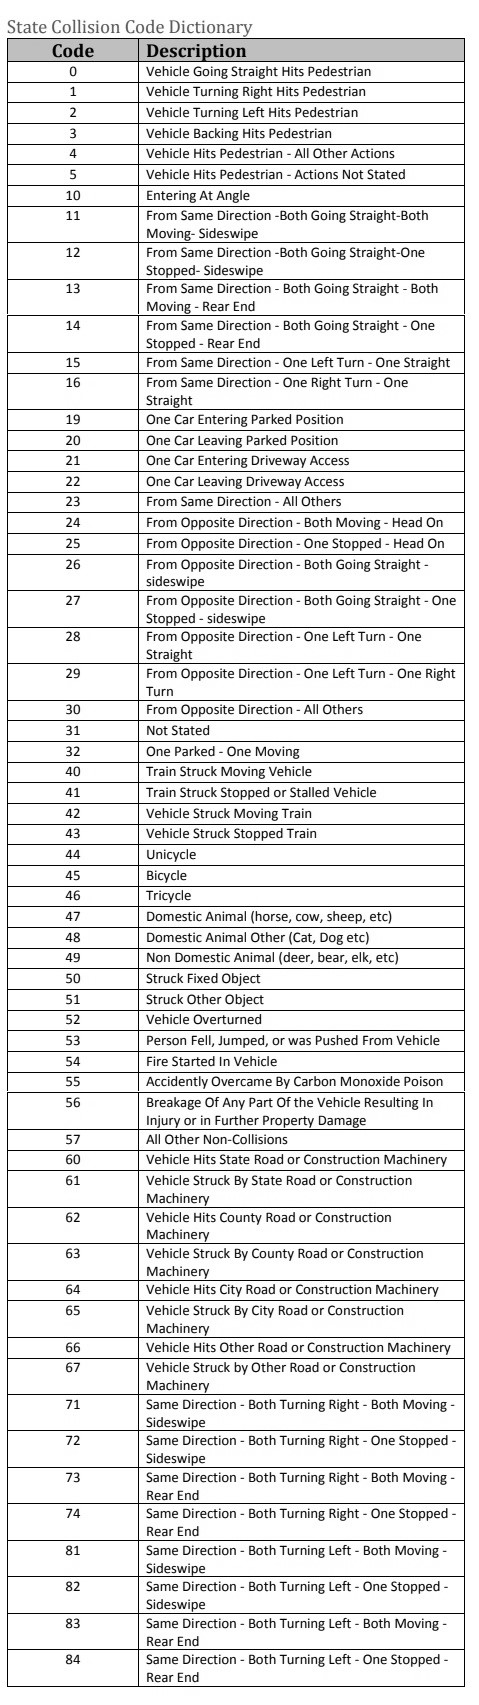

#### Example

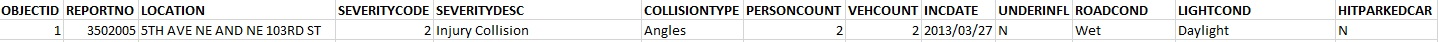

Example shown above illustrates the incident that occurred 03/27/2013, involving collision of the 2 vehicles on an angle. 2 people were involved. No parked vehicles were taking part in the event. Incident occured in the daylight, but probably wet road conditions were the reason.

---